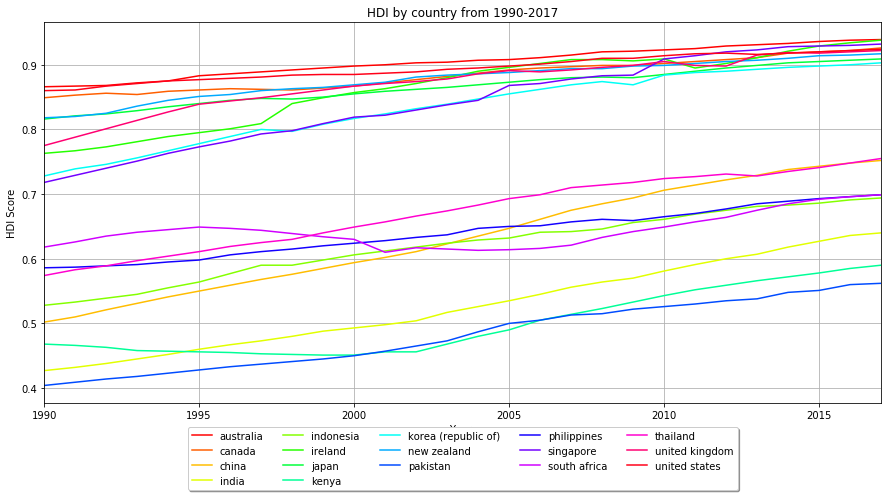

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import os

DATA_DIR = 'data'
HDI_DIR = os.path.join(DATA_DIR, 'human_development_index')
FILE = os.path.join(HDI_DIR, 'hdi.csv')

# Read HDI data
hdi_df = pd.read_csv(FILE, skiprows=1)

# Drop empty columns
hdi_df = hdi_df.dropna(how='all', axis=1)

# Drop Rank column
hdi_df.drop('HDI Rank (2017)', axis=1, inplace=True)

# Convert Country to lowercase and strip whitespaces
hdi_df["Country"] = hdi_df["Country"].str.lower().str.strip()

# List of countries we require
SELECTED_COUNTRIES = ['south africa','kenya','china','taiwan','japan','korea (republic of)',
                      'india','pakistan','indonesia','philippines','singapore',
                      'thailand','canada','united kingdom','ireland','scotland',
                      'australia','new zealand','united states']

# select countries based on the list above
hdi_df = hdi_df[hdi_df["Country"].isin(SELECTED_COUNTRIES)]

# Reindex and convert to numeric
hdi_df = hdi_df.reset_index(drop=True)
hdi_df.loc[:,1:] = hdi_df.iloc[:,1:].apply(pd.to_numeric)

# Transform data set to correspond to the plot
hdi_df = hdi_df.set_index("Country").T

# Plot HDI data
ax = hdi_df.plot(figsize=(15,7), grid=True, colormap='hsv')
ax.set(title='HDI by country from 1990-2017', xlabel="Years", ylabel="HDI Score")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

